# Graphes de comparaison

Nous allons réaliser une première étude des données en comparant certaines données entre elles. Le but est d'essayer d'observer des premières corrélations entre l'attrition et certains critères comme le salaire, le temps de travail, le poste occupé, etc... dans le but d'avoir un début d'idée concernant la solution à notre problème avant de créer notre modèle de machine learning.

## Importation des librairies

In [85]:
# Importation des librairies
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importation des données

In [86]:
complete_csv = pd.read_pickle('./Datasets/complete_dataset_no_scaling.pkl')
misc_graphs_dataset = complete_csv.copy()

## Attrition en fonction du temps de travail et du salaire

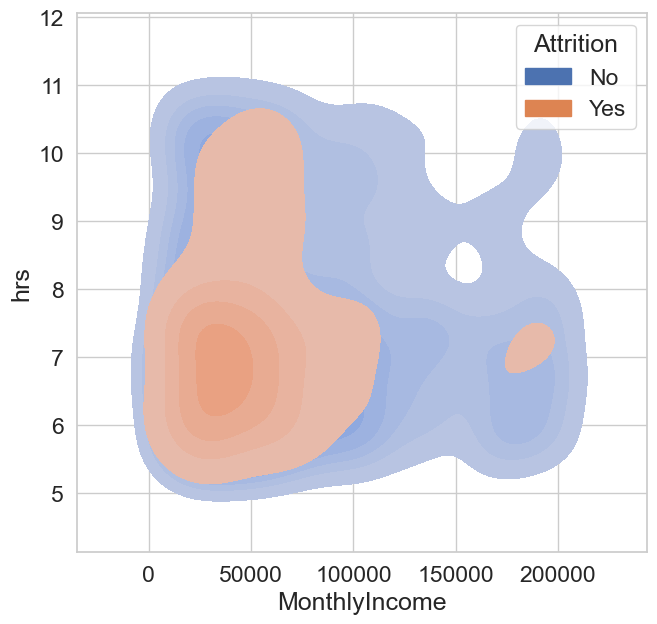

In [87]:
sns.set( font_scale=1.5)
sns.set_style("whitegrid")
plt.figure(figsize=(25,7))

plt.subplot(1,3,1)
sns.kdeplot(
    data=misc_graphs_dataset, x="MonthlyIncome", y="hrs", hue="Attrition", fill=True, levels=10, thresh=.06,
)
plt.show()

Le graphe ci-dessus donne une indication sur la répartition des employés qui ont quitté l'entreprise selon leur salaire en fonction des heures travaillées. On voit qu'une forte proportion des attritions est là où les salaires sont les plus faibles. Si la proportion la plus importante se situe aux alentours de 7 heures travaillées pour un salaire de ~40 000 roupies, ces valeurs correspondent à la majorité des employés dans l'entreprise, et sont donc peu révélatrices. Ce qui nous intéresse, en revanche, est la proportion située dans la même tranche de salaire, mais pour un nombre d'heures travaillées supérieures. On se rend compte que pour un même salaire, les employés ont une plus forte tendance à quitter l'entreprise si leur nombre d'heures travaillées est supérieur à la moyenne.

## Corrélation entre le salaire et la satisfaction au travail

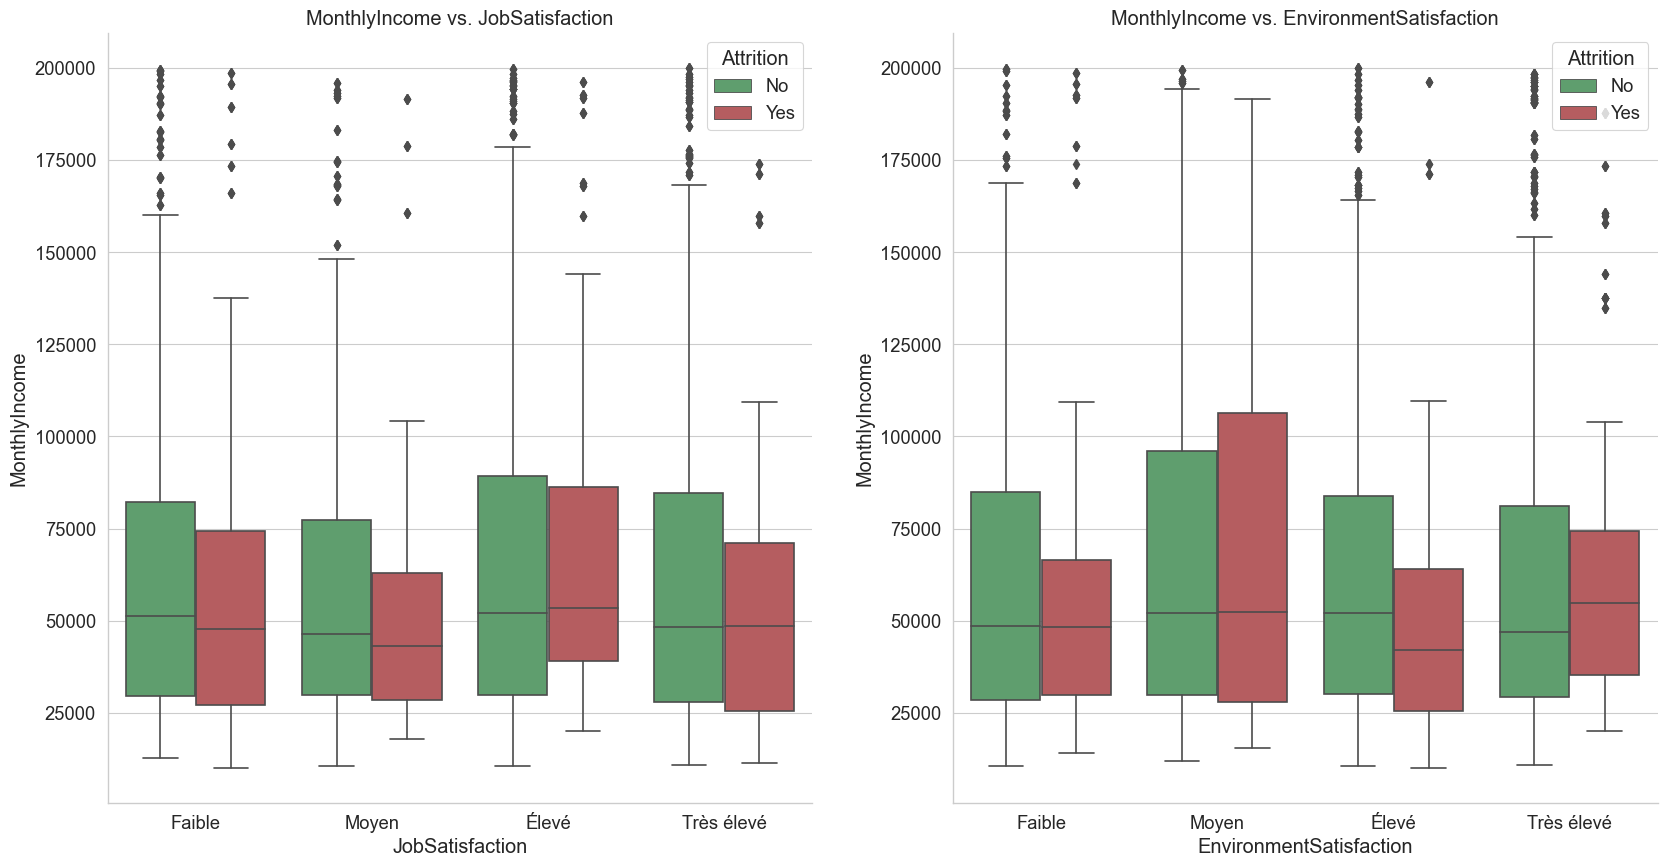

In [88]:
sns.set(context="paper", font_scale=1.5)
plt.figure(figsize=(20,10))
sns.set_style("whitegrid")

plt.subplot(1,2,1)
sns.boxplot(x="JobSatisfaction", y="MonthlyIncome", hue="Attrition", palette=['g','r'], order=['Faible', 'Moyen', 'Élevé', 'Très élevé'], data=misc_graphs_dataset)
plt.legend(loc=1,title='Attrition')
sns.despine()
plt.title('MonthlyIncome vs. JobSatisfaction')

plt.subplot(1,2,2)
sns.boxplot(x="EnvironmentSatisfaction", y="MonthlyIncome", hue="Attrition", palette=['g','r'], order=['Faible', 'Moyen', 'Élevé', 'Très élevé'], data=misc_graphs_dataset)
plt.legend(loc=1,title='Attrition')
sns.despine()
plt.title('MonthlyIncome vs. EnvironmentSatisfaction')

plt.show()

## Corrélation entre l'attrition et la qualité du travail et de l'environnement

In [89]:
#Préparation des données pour les prochains graphes
misc_graphs_dataset['Attrition'] = misc_graphs_dataset['Attrition'].replace({'1': 1, '0': 0})
misc_graphs_dataset['JobInvolvement'] = misc_graphs_dataset['JobInvolvement'].replace({'Faible': 0, 'Moyenne': 1, 'Importante': 2, 'Très importante': 3})
misc_graphs_dataset['JobSatisfaction'] = misc_graphs_dataset['JobSatisfaction'].replace({'Faible': 0, 'Moyen': 1, 'Élevé': 2, 'Très élevé': 3})
misc_graphs_dataset['PerformanceRating'] = misc_graphs_dataset['PerformanceRating'].replace({'Excellent': 0, 'Au delà des attentes': 1})

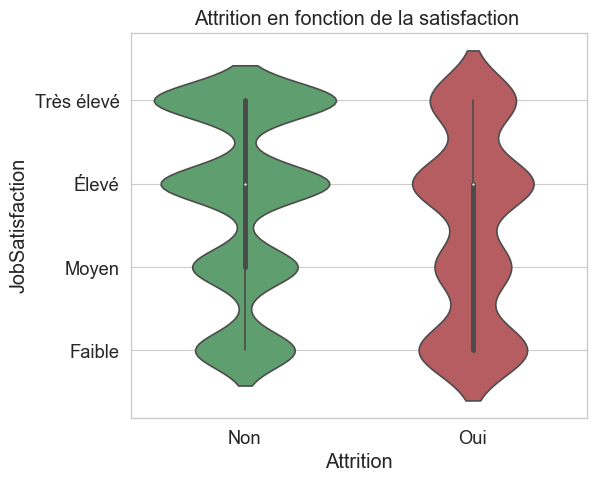

In [90]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
plot1 = sns.violinplot(data=misc_graphs_dataset, x="Attrition", y="JobSatisfaction", palette=['g','r'])
plot1.set_xticklabels(['Non','Oui'])
plot1.set_yticks(range(4))
plot1.set_yticklabels(['Faible','Moyen', 'Élevé', 'Très élevé'])
plt.title('Attrition en fonction de la satisfaction ')

plt.show()

Le diagramme en violon ci-dessus nous donne une bonne indication à propos de l'influence de la satisfaction de l'employé par rapport à son travail sur sa probabilité de quitter l'entreprise. La boite à moustaches à l'intérieur du diagramme vert (qui représente les employés qui n'ont pas quitté l'entreprise) nous indique, de par la répartition de ses quartiles, que les employés qui sont restés sont moyennement voire très satisfaits de leur travail. Au contraire, La boite à moustaches à l'intérieur du diagramme rouge (qui représente les employés qui ont quitté l'entreprise) nous indique, de par la répartition de ses quartiles, que les employés qui ne sont pas restés étaient rarement très satisfaits de leur travail.

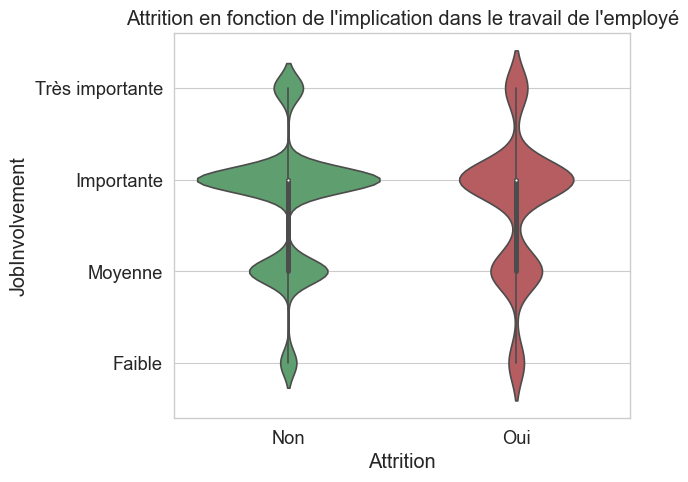

In [91]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,2)
plot2 = sns.violinplot(data=misc_graphs_dataset, x="Attrition", y="JobInvolvement", palette=['g','r'])
plot2.set_xticklabels(['Non','Oui'])
plot2.set_yticks(range(4))
plot2.set_yticklabels(['Faible','Moyenne', 'Importante', 'Très importante'])
plt.title('Attrition en fonction de l\'implication dans le travail de l\'employé')

plt.show()

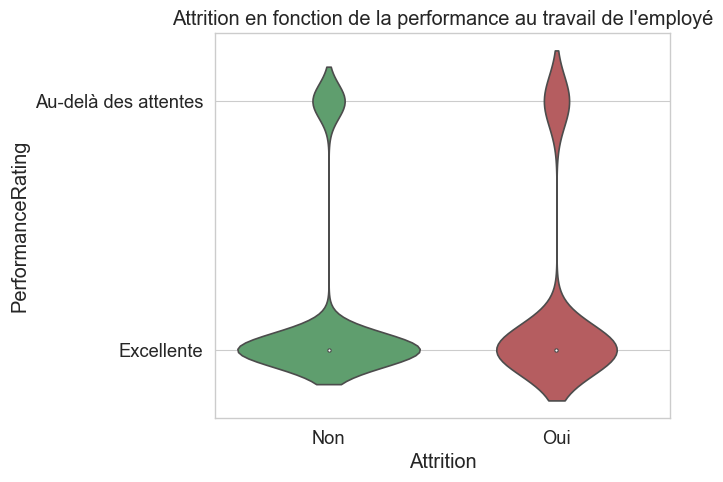

In [92]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,3)
plot3 = sns.violinplot(data=misc_graphs_dataset, x="Attrition", y="PerformanceRating", palette=['g','r'])
plot3.set_xticklabels(['Non','Oui'])
plot3.set_yticks(range(2))
plot3.set_yticklabels(['Excellente','Au-delà des attentes'])
plt.title('Attrition en fonction de la performance au travail de l\'employé')

plt.show()

Les deux digrammes en violon ci-dessus représentent respectivement l'attrition en fonction de l'implication dans le travail et de la performance au travail de l'employé. On n'observe pas de différence notable entre la répartition des effectifs entre les employés ayant quitté l'entreprise et ceux étant restés. On ne peut donc pas affirmer que l'implication dans le travail de l'employé ou son implication dans le travail sont des critères qui pourraient favoriser son départ de l'entreprise.

## Conclusion

À partir de l'étude de ces graphes, nous pouvons déjà avoir une idée concernant les critères qui favorisent le départ d'un employé de l'entreprise. Un employé qui touche un salaire situé parmi les plus bas de l'entreprise aura davantage de chances de s'en aller, d'autant plus s'il travaille de nombreuses heures par jour en moyenne. De plus, un employé qui ne se sent pas satisfait de son travail est plus susceptible de quitter l'entreprise.

Ces premiers résultats nous semblent cohérents et pourraient probablement expliquer le choix de certains employés de quitter l'entreprise, provoquant le turn-over observé.